<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%9E%91_CV%E2%80%8B01_%EC%86%90%EA%B8%80%EC%94%A8_%EC%BC%80%EB%9D%BC%EC%8A%A4_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import tensorflow as tf
import numpy as np

In [2]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


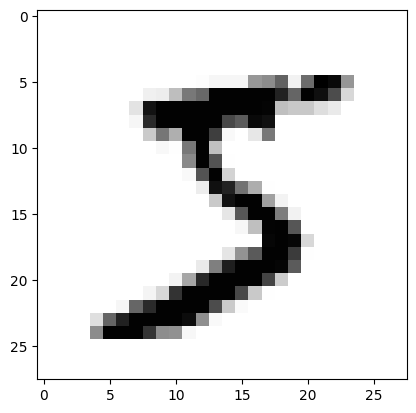

In [3]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [4]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [5]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(-1, 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(-1, 784).astype('float32')

In [6]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [8]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


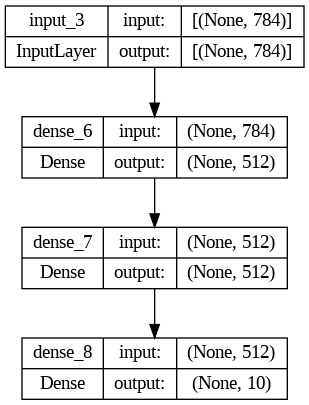

In [23]:
from tensorflow.keras import utils
# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()
utils.plot_model(model, show_shapes=True)

In [24]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [25]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=2)
print(history.history.keys())

Epoch 1/30
48/48 - 4s - loss: 11.9592 - categorical_accuracy: 0.8082 - val_loss: 1.1648 - val_categorical_accuracy: 0.9191 - 4s/epoch - 80ms/step
Epoch 2/30
48/48 - 2s - loss: 0.7140 - categorical_accuracy: 0.9348 - val_loss: 0.6685 - val_categorical_accuracy: 0.9345 - 2s/epoch - 48ms/step
Epoch 3/30
48/48 - 2s - loss: 0.3266 - categorical_accuracy: 0.9576 - val_loss: 0.5403 - val_categorical_accuracy: 0.9439 - 2s/epoch - 48ms/step
Epoch 4/30
48/48 - 2s - loss: 0.1733 - categorical_accuracy: 0.9714 - val_loss: 0.5051 - val_categorical_accuracy: 0.9471 - 2s/epoch - 48ms/step
Epoch 5/30
48/48 - 3s - loss: 0.0895 - categorical_accuracy: 0.9820 - val_loss: 0.4905 - val_categorical_accuracy: 0.9482 - 3s/epoch - 63ms/step
Epoch 6/30
48/48 - 2s - loss: 0.0478 - categorical_accuracy: 0.9885 - val_loss: 0.4653 - val_categorical_accuracy: 0.9507 - 2s/epoch - 48ms/step
Epoch 7/30
48/48 - 2s - loss: 0.0214 - categorical_accuracy: 0.9945 - val_loss: 0.4528 - val_categorical_accuracy: 0.9515 - 2s/ep

In [26]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[11.959230422973633, 0.713986337184906, 0.32662084698677063, 0.1732637882232666, 0.08947250247001648, 0.047825876623392105, 0.021361129358410835, 0.009659623727202415, 0.004051727708429098, 0.0015404263976961374, 0.0006165316444821656, 0.00033270788844674826, 0.00024102695169858634, 0.00020581783610396087, 0.00018559028103481978, 0.00016959375352598727, 0.00015753817569930106, 0.00014612148515880108, 0.00013746286276727915, 0.00012914283433929086, 0.00012164936197223142, 0.00011476554209366441, 0.00010910840501310304, 0.0001036343164741993, 9.865069296211004e-05, 9.431199578102678e-05, 9.011567453853786e-05, 8.601830631960183e-05, 8.242516923928633e-05, 7.889369589975104e-05]


In [27]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

[1.1648244857788086, 0.6685263514518738, 0.5402800440788269, 0.5051211714744568, 0.4904947876930237, 0.46526241302490234, 0.4528413414955139, 0.4433877468109131, 0.44010937213897705, 0.441337525844574, 0.43688473105430603, 0.43643978238105774, 0.4372958838939667, 0.43675389885902405, 0.4367923438549042, 0.4364129304885864, 0.43649935722351074, 0.4362303614616394, 0.436049222946167, 0.43623271584510803, 0.4357761740684509, 0.4359411299228668, 0.43590047955513, 0.4358433485031128, 0.43595296144485474, 0.4359390437602997, 0.43570539355278015, 0.4356638491153717, 0.43565213680267334, 0.4356289505958557]


In [28]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3763 - categorical_accuracy: 0.9593

 Test Accuracy: 0.9593


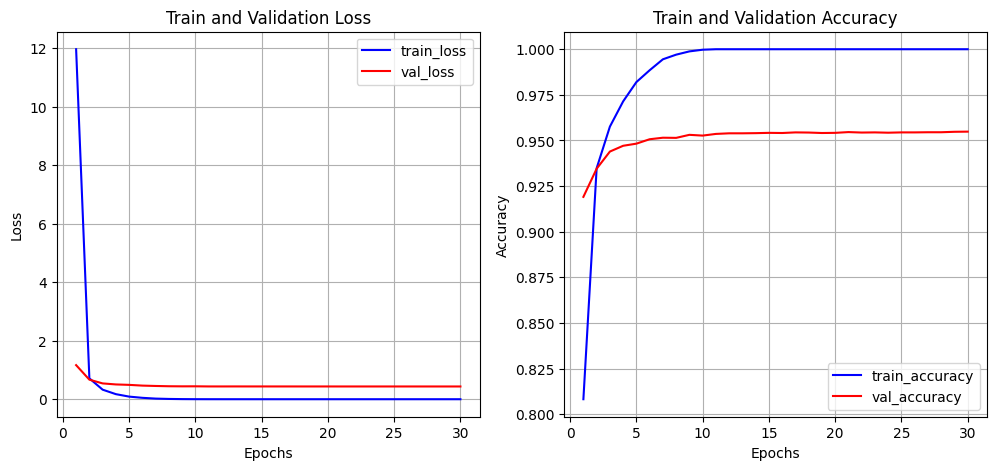

In [29]:
# 도식화 표현
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['categorical_accuracy']
    val_accuracy = history_dict['val_categorical_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

import matplotlib.pyplot as plt
import numpy as np
show_history(history)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                           

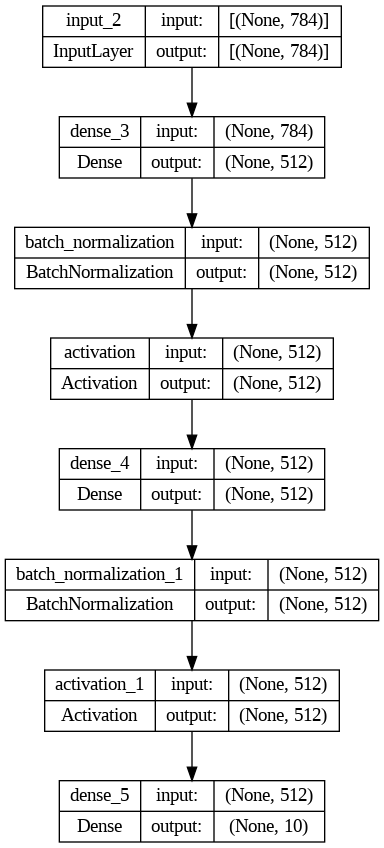

In [17]:
# 모델 설계
from tensorflow.keras import utils
from tensorflow.keras.layers import BatchNormalization

input_layer = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(512)(input_layer)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
out_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()
utils.plot_model(model, show_shapes=True)

In [19]:
#  loss 함수, optimizer, metric 설정 & 모델 compile
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])



In [20]:
# Training
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)
print(history.history.keys())

Epoch 1/30
375/375 [==============================] - 5s 12ms/step - loss: 0.1773 - categorical_accuracy: 0.9453 - val_loss: 0.1068 - val_categorical_accuracy: 0.9672
Epoch 2/30
375/375 [==============================] - 5s 12ms/step - loss: 0.0703 - categorical_accuracy: 0.9779 - val_loss: 0.0890 - val_categorical_accuracy: 0.9740
Epoch 3/30
375/375 [==============================] - 4s 12ms/step - loss: 0.0432 - categorical_accuracy: 0.9863 - val_loss: 0.0939 - val_categorical_accuracy: 0.9745
Epoch 4/30
375/375 [==============================] - 5s 12ms/step - loss: 0.0286 - categorical_accuracy: 0.9907 - val_loss: 0.0983 - val_categorical_accuracy: 0.9762
Epoch 5/30
375/375 [==============================] - 6s 16ms/step - loss: 0.0213 - categorical_accuracy: 0.9935 - val_loss: 0.0895 - val_categorical_accuracy: 0.9793
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0149 - categorical_accuracy: 0.9953 - val_loss: 0.0831 - val_categorical_accuracy: 0.978

In [21]:
# 성능 확인
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0842 - categorical_accuracy: 0.9852

 Test Accuracy: 0.9852


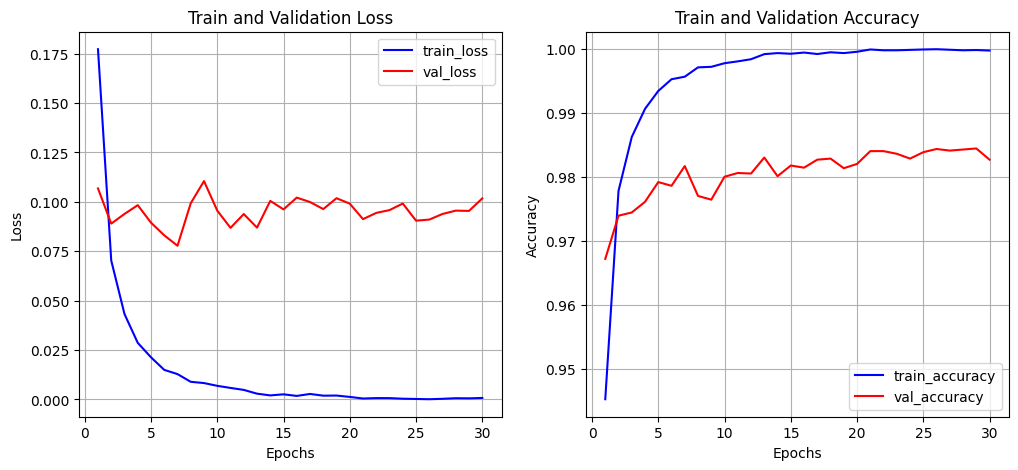

In [22]:
# 도식화 표현
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['categorical_accuracy']
    val_accuracy = history_dict['val_categorical_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

import matplotlib.pyplot as plt
import numpy as np
show_history(history)